In [1]:
import os
from lib.train_AI_lib import *

In [2]:
os.chdir('..')  # Setting current directory to root of repo
print(os.getcwd())

c:\Users\kevin\Documents\GitHub\APS360-2020Summer-Project


In [3]:
class exNetClass(nn.Module):
    def __init__(self, name):
        super(exNetClass, self).__init__()
        self.name = name

        self.conv1 = nn.Conv2d(3,   4,  4, stride=2)  # n = 1024 -> 510
        self.conv2 = nn.Conv2d(4,  5,  4, stride=2)  # n = 510  -> 255
        self.pool1 = nn.MaxPool2d(3, 2)                # n = 255  -> 127
        self.conv3 = nn.Conv2d(5,  5,  4, stride=2)  # n = 127  -> 62
        self.pool2 = nn.MaxPool2d(4, 2)                # n = 62   -> 30

        self.fc1   = nn.Linear(1*1*5, 10)
        self.fc2   = nn.Linear(10, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        #print(x.size())
        x = F.relu(self.conv2(x))
        #print(x.size())
        x = self.pool2(F.relu(self.conv3(x)))
        #print(x.size())
        x = x.view(-1, 1*1*5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return(x)

Epoch 0 | Time Taken: 18.02s | Training Error: 0.9842951059, Training loss: 47.8958861077 | Validation Error: 0.9912280702, Validation loss: 49.1306279577
Epoch 1 | Time Taken: 2.28s | Training Error: 0.9952520088, Training loss: 43.0960073637 | Validation Error: 0.9795321637, Validation loss: 29.0626050065
Epoch 2 | Time Taken: 2.27s | Training Error: 0.9890430972, Training loss: 22.7149767335 | Validation Error: 0.9941520468, Validation loss: 22.9318719901
Epoch 3 | Time Taken: 2.29s | Training Error: 0.9861212564, Training loss: 21.6655022797 | Validation Error: 0.9824561404, Validation loss: 22.5273554906
Epoch 4 | Time Taken: 2.29s | Training Error: 0.9897735573, Training loss: 21.5552452439 | Validation Error: 0.9824561404, Validation loss: 21.8598533871
Epoch 5 | Time Taken: 2.24s | Training Error: 0.9883126370, Training loss: 21.2445673436 | Validation Error: 0.9766081871, Validation loss: 21.9787532050
Epoch 6 | Time Taken: 2.26s | Training Error: 0.9872169467, Training loss: 

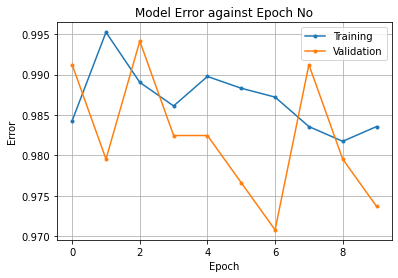

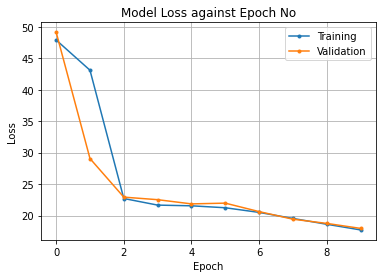

In [4]:
batchsize=64; lr=0.001; epochNo=10
trainLoader, valLoader, _ = loadData(batchsize, inPath="saved/0.1_resolution", mode='default')
net = exNetClass("netA"); net.cuda()
netATrain = trainNet(net, [trainLoader, valLoader], batchsize, epochNo, lr, cuda=1)

Tested 99.96%

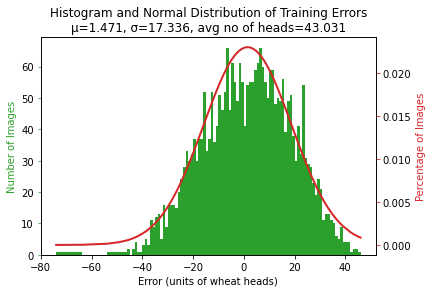

In [4]:
net = exNetClass('netA'); net.cuda()
netPath = 'saved/TrainingRuns/RegAdamTrainer/netA_b64_te10_lr0.001'
net.load_state_dict(torch.load(netPath+'/model_epoch9'))
trainLoader, valLoder, testLoader = loadData(1, inPath="saved/0.1_resolution")
_ = regresAnalysis(net, trainLoader, netPath)

In [7]:
class exNetClassFull(nn.Module):
    def __init__(self, name):
        super(exNetClassFull, self).__init__()
        self.name = name

        self.conv1 = nn.Conv2d(3,   4,  4, stride=2)  # n = 1024 -> 510
        self.conv2 = nn.Conv2d(4,  5,  4, stride=2)  # n = 510  -> 255
        self.pool1 = nn.MaxPool2d(3, 2)                # n = 255  -> 127
        self.conv3 = nn.Conv2d(5,  5,  4, stride=2)  # n = 127  -> 62
        self.pool2 = nn.MaxPool2d(4, 2)                # n = 62   -> 30

        self.fc1   = nn.Linear(30*30*5, 10)
        self.fc2   = nn.Linear(10, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        #print(x.size())
        x = F.relu(self.conv2(x))
        #print(x.size())
        x = self.pool2(F.relu(self.conv3(x)))
        #print(x.size())
        x = x.view(-1, 30*30*5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return(x)

In [8]:
batchsize=64; lr=0.001; epochNo=10
trainLoader, valLoader, _ = loadData(batchsize)
net = exNetClassFull("netB"); net.cuda()
netATrain = trainNet(net, [trainLoader, valLoader], batchsize, epochNo, lr, cuda=1)

RuntimeError: CUDA out of memory. Tried to allocate 768.00 MiB (GPU 0; 6.00 GiB total capacity; 2.98 GiB already allocated; 471.43 MiB free; 2.99 GiB reserved in total by PyTorch)

In [ ]:
net = exNetClassFull('netB'); net.cuda()
netPath = 'saved/TrainingRuns/RegAdamTrainer/netB_b64_te10_lr0.001'
net.load_state_dict(torch.load(netPath+'/model_epoch9'))
trainLoader, valLoder, testLoader = loadData(1)
_ = regresAnalysis(net, trainLoader, netPath)